In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df1=pd.read_csv('train_housing.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


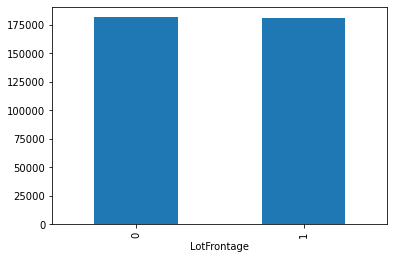

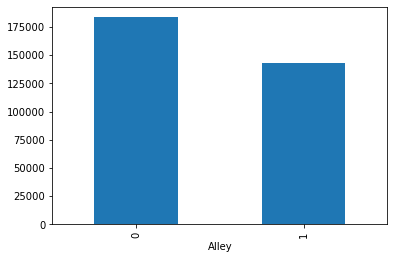

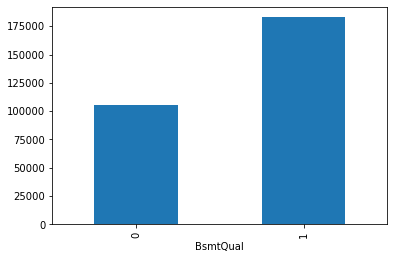

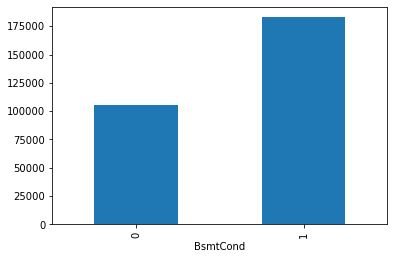

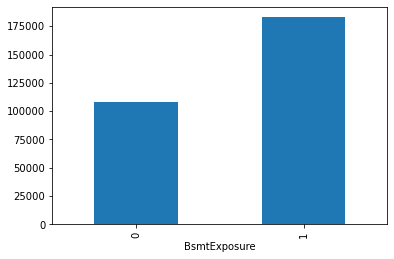

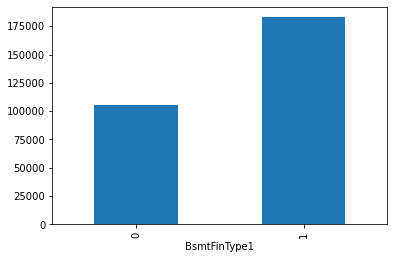

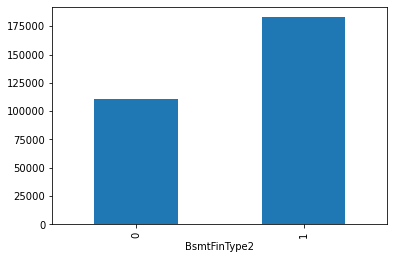

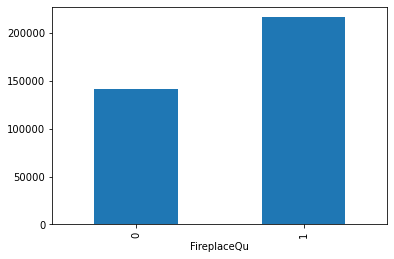

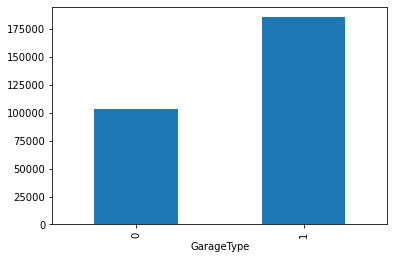

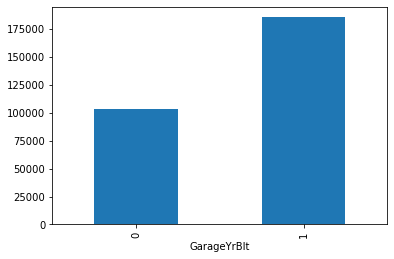

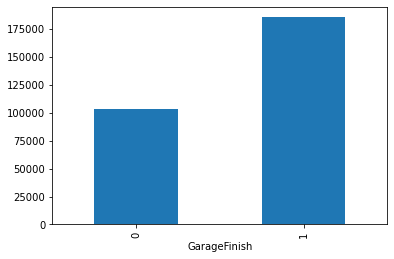

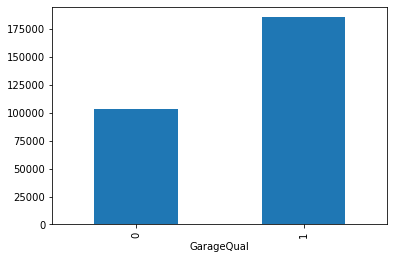

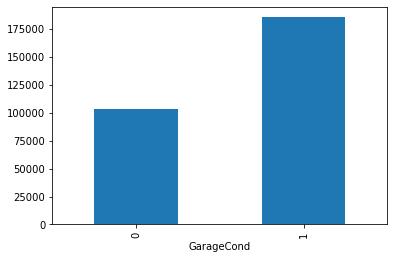

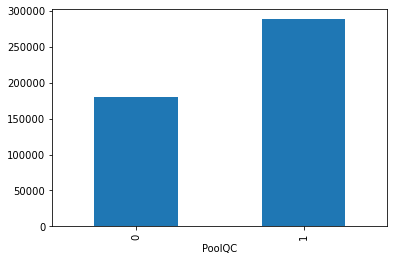

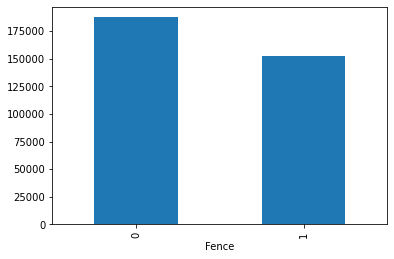

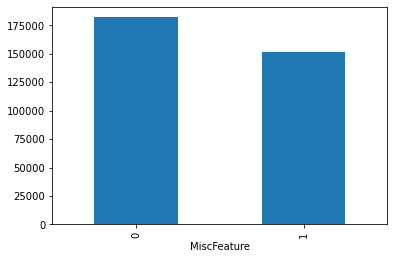

In [15]:
col_null =[ feature for feature in df1.columns if pd.isnull(df1[feature]).sum()>10]
for feature in col_null:
    data=df1.copy()
    data[feature]=np.where(pd.isnull(df1[feature]),0,1)
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.show()

<AxesSubplot:>

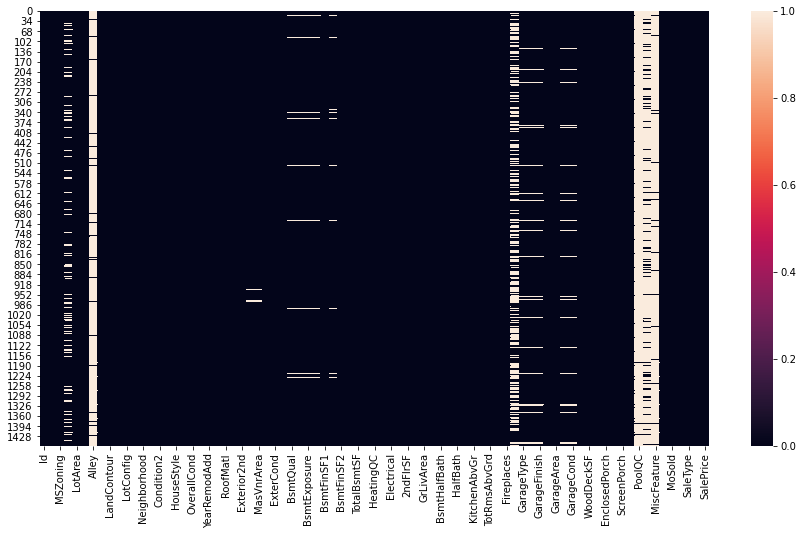

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.isnull(df1))

<AxesSubplot:xlabel='YrSold'>

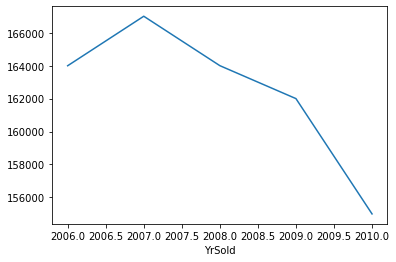

In [17]:
df1.groupby('YrSold')['SalePrice'].median().plot()

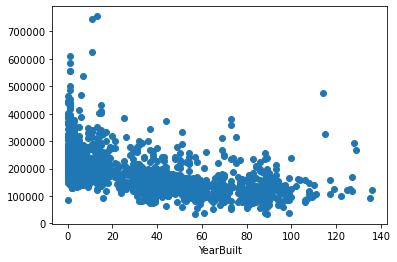

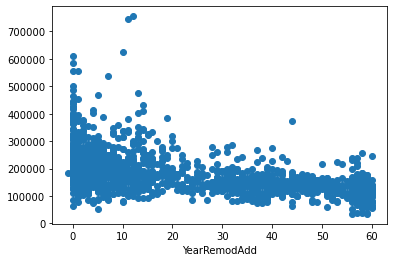

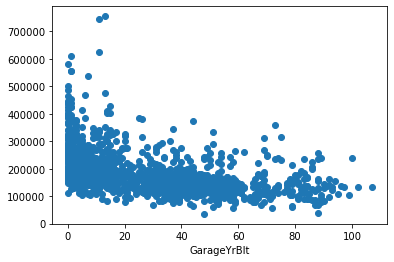

In [18]:
df_num= [feature for feature in df1.columns if df1[feature].dtype!='O']

year=[feature for feature in df_num if 'Year' in feature or 'Yr' in feature]
df_num=[feature for feature in df_num if  'Year' not in feature and 'Yr' not in feature]
df1[df_num]
for feature in year:
    if feature!='YrSold':
        data=df1.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(x=data[feature],y=data['SalePrice'])
        plt.xlabel(feature)
        plt.show()
  


In [19]:
df_null=pd.isnull(df1).apply(lambda x:x.sum())
df_null.sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

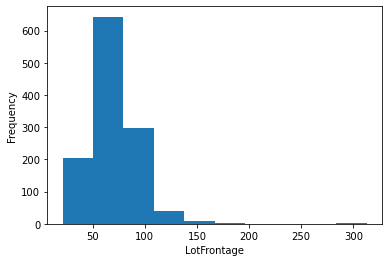

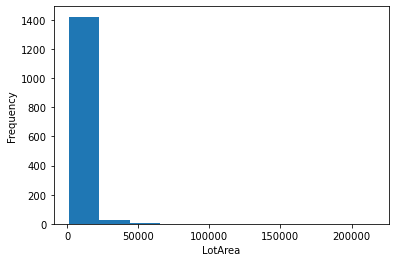

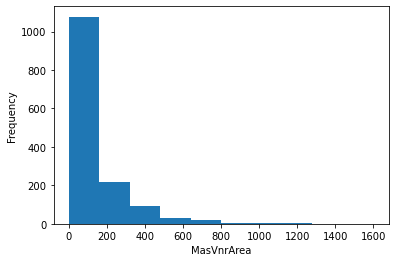

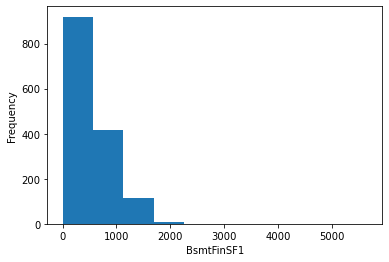

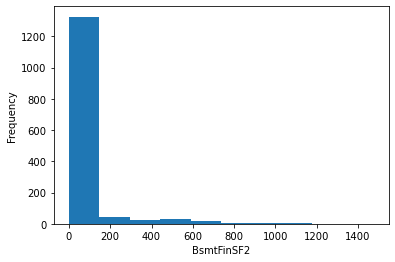

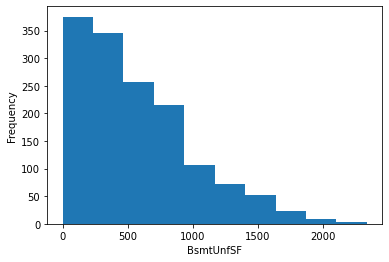

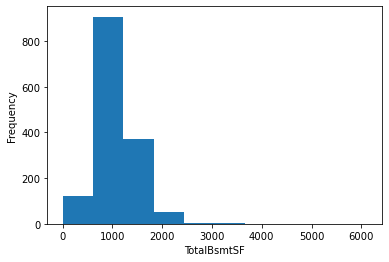

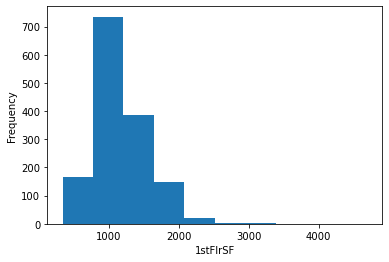

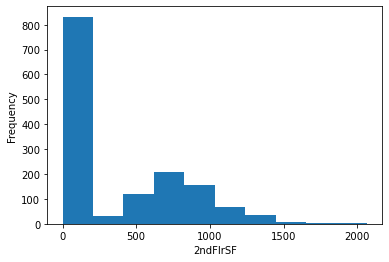

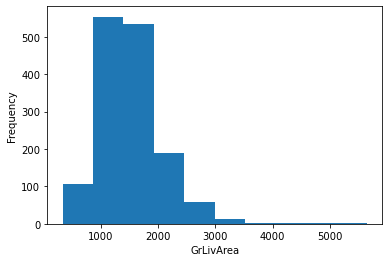

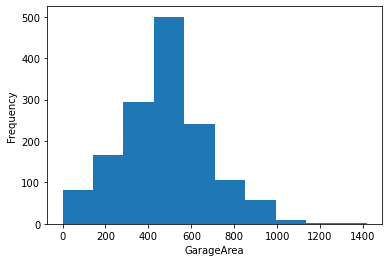

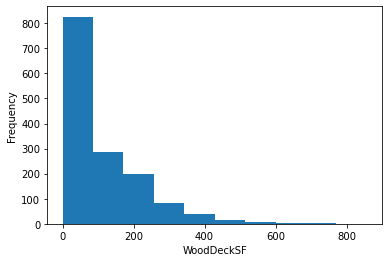

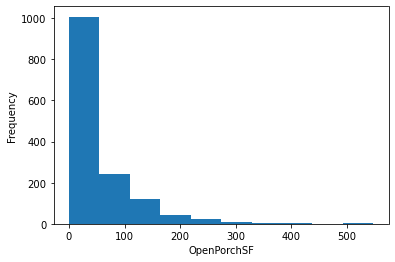

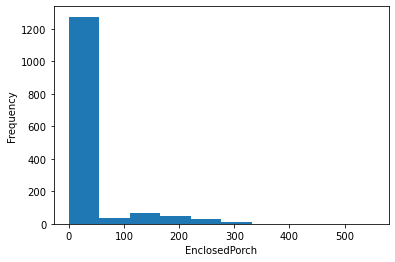

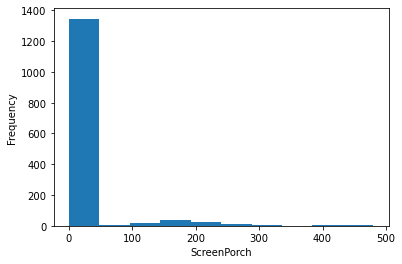

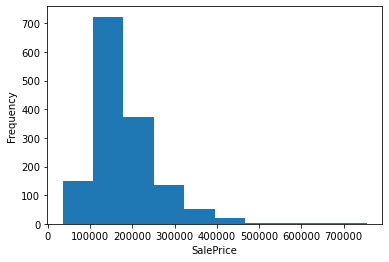

In [20]:
dis_var=[feature for feature in df1.columns if len(df1[feature].unique()) <25 and feature not in year+['Id'] ]
cou_var=[feature for feature in df1.columns.drop('Neighborhood') if feature not in dis_var and feature not in year +['Id']]
for feature in cou_var:
    data=df1.copy()
    data[feature].plot.hist()
    plt.xlabel(feature)
    
    plt.show()

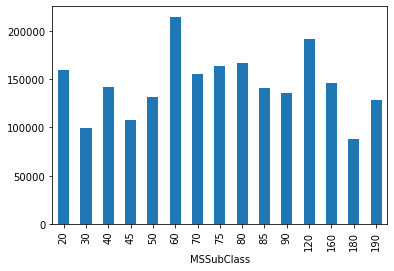

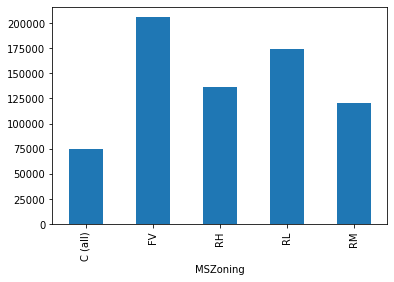

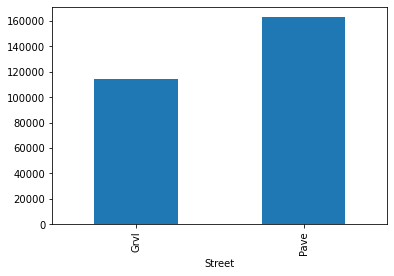

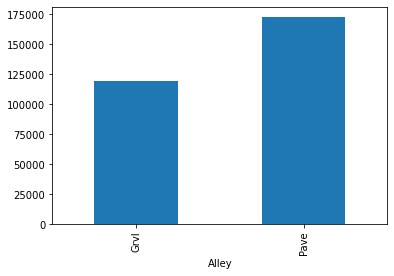

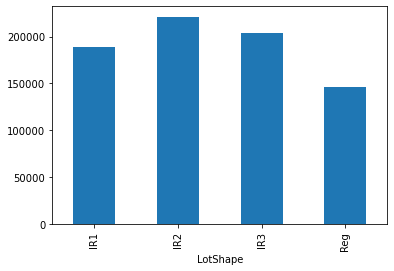

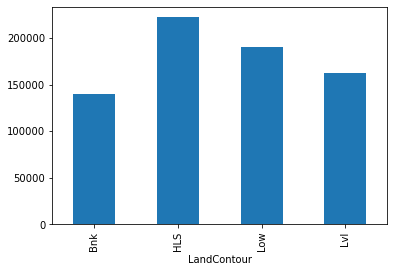

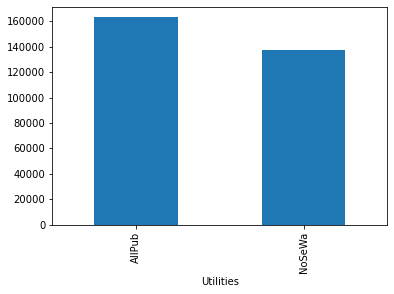

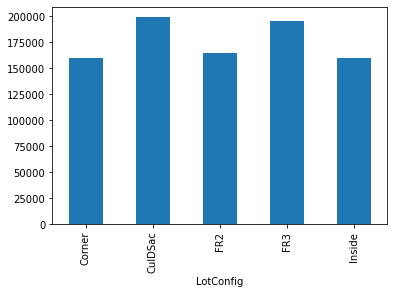

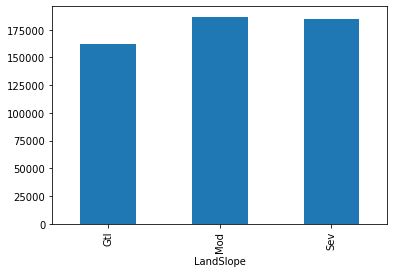

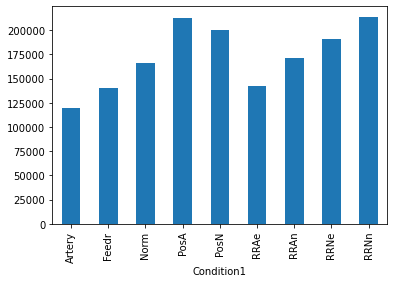

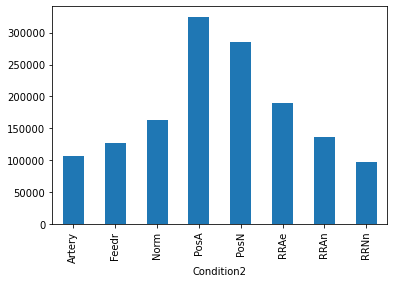

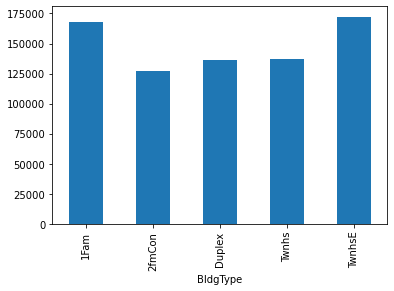

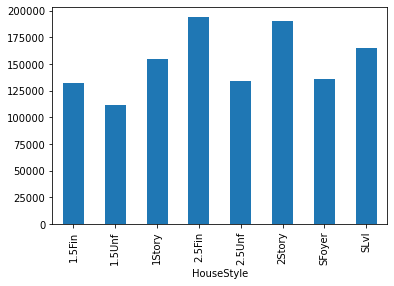

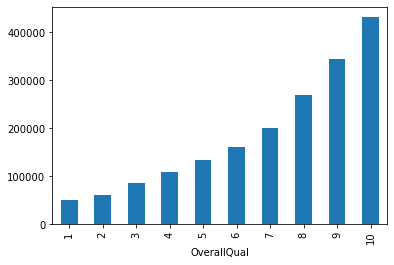

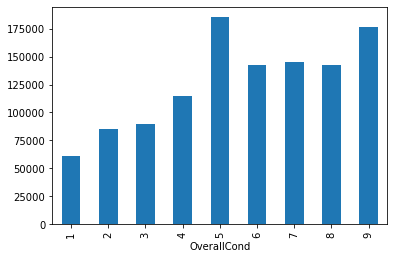

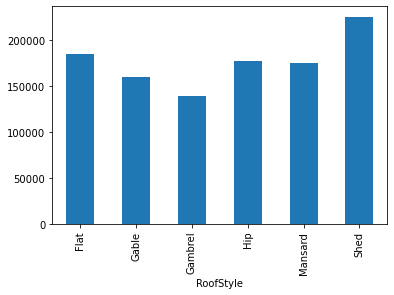

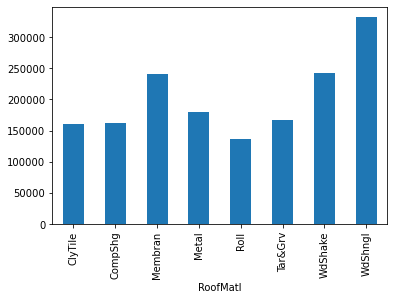

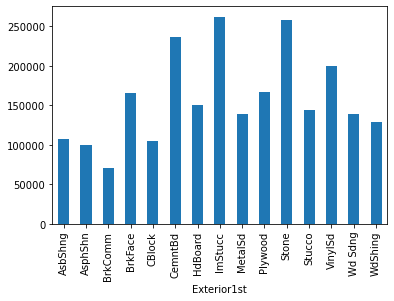

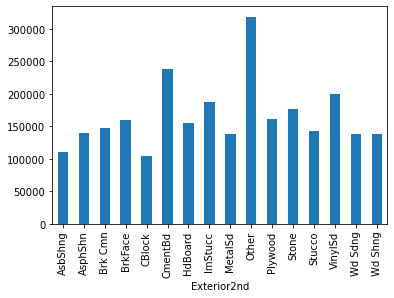

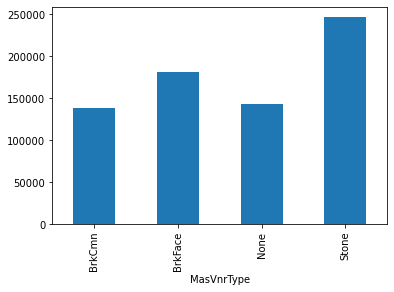

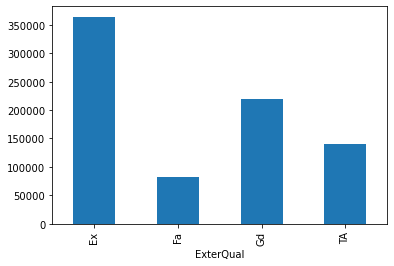

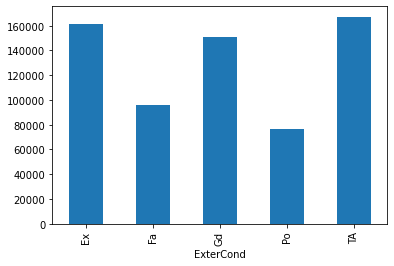

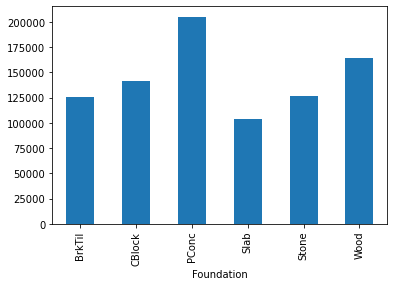

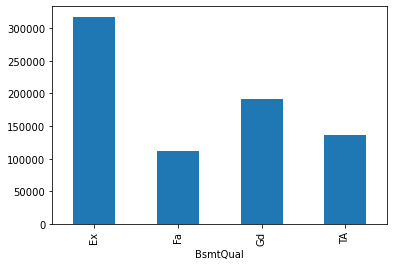

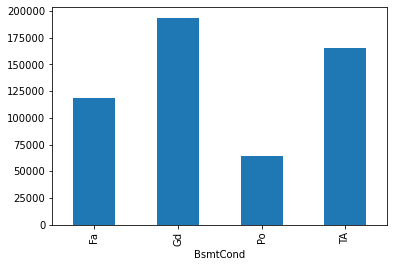

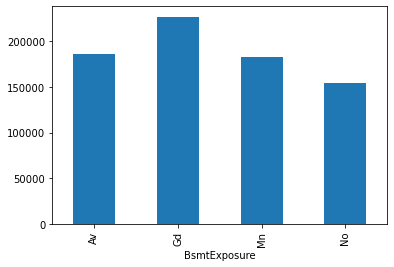

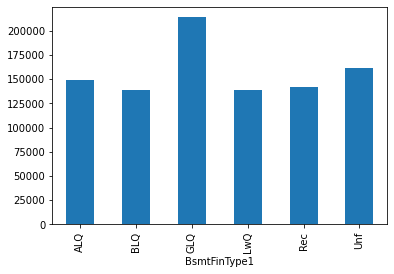

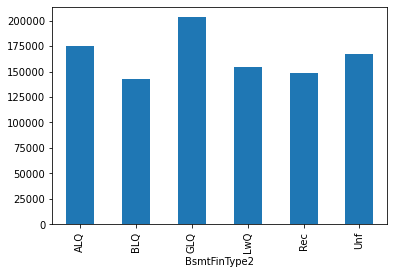

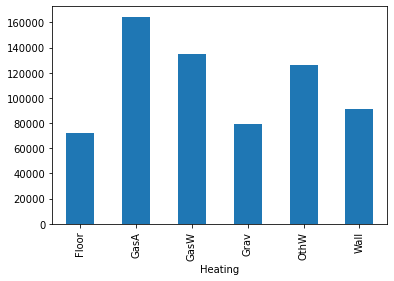

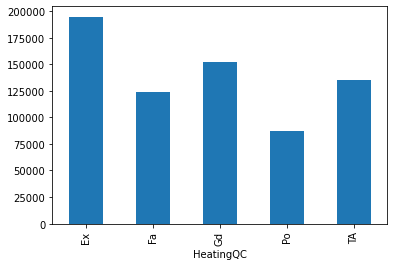

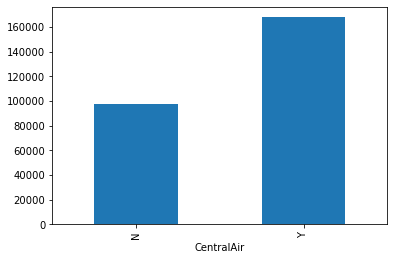

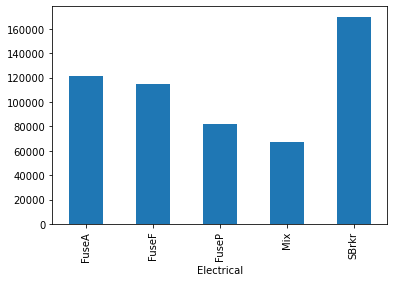

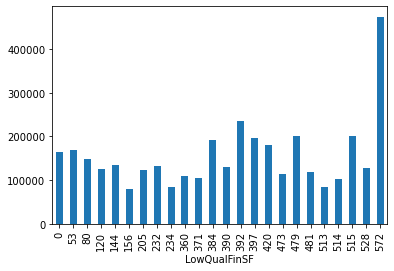

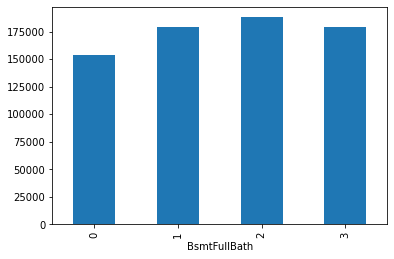

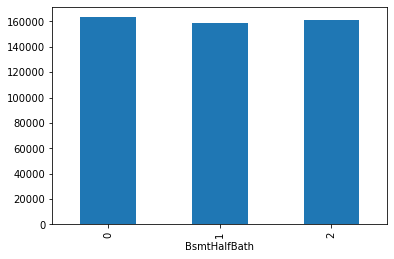

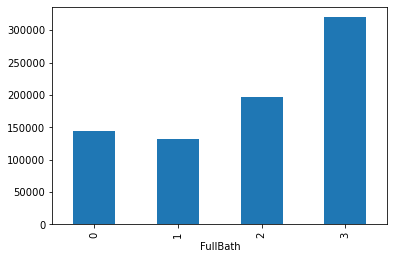

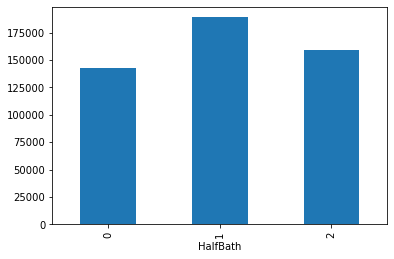

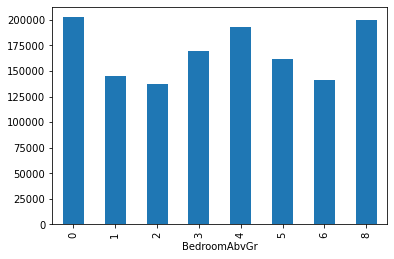

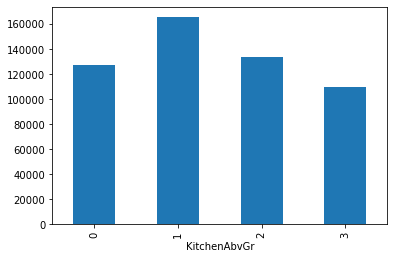

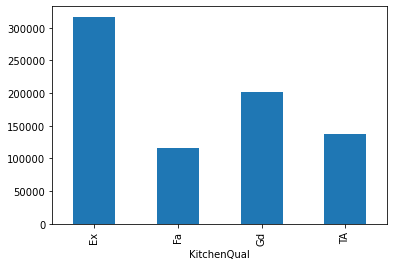

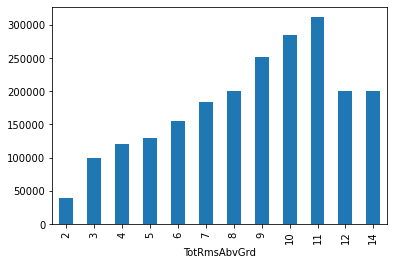

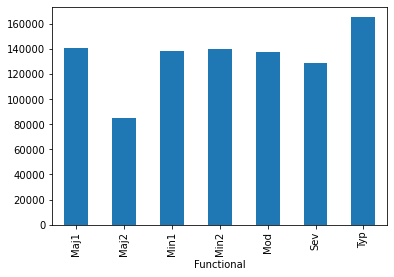

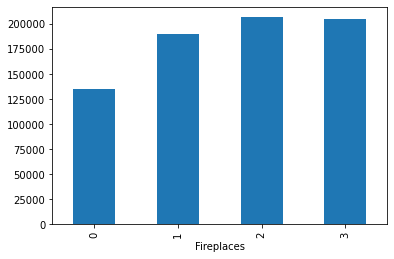

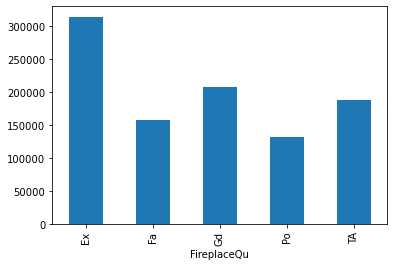

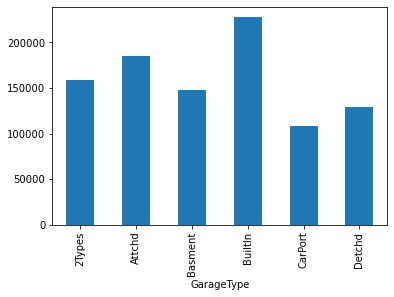

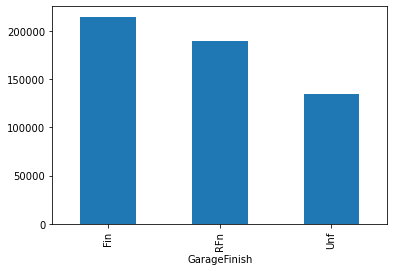

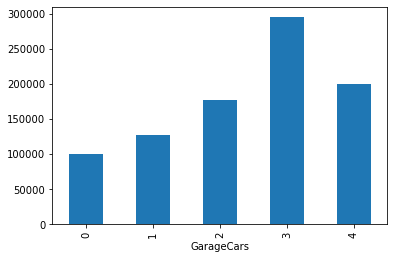

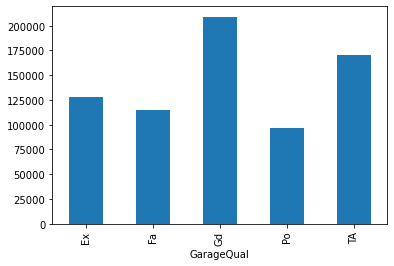

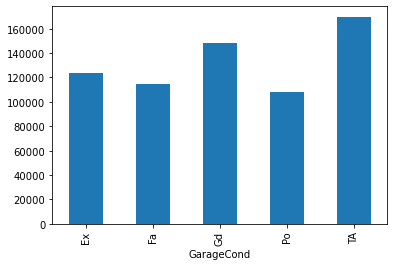

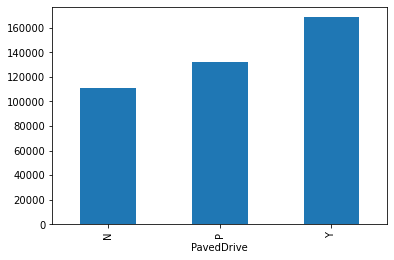

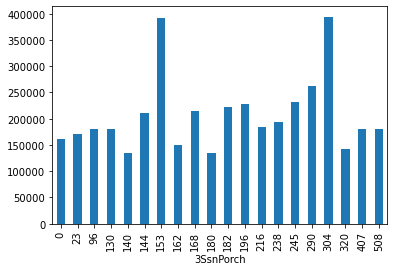

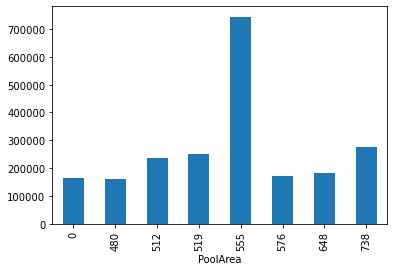

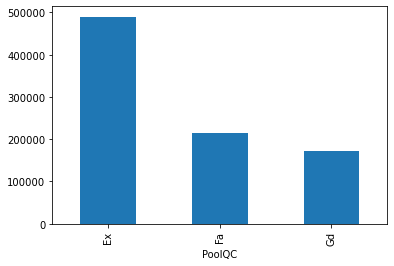

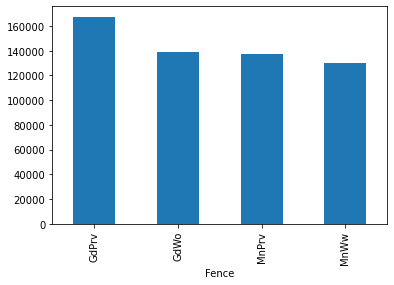

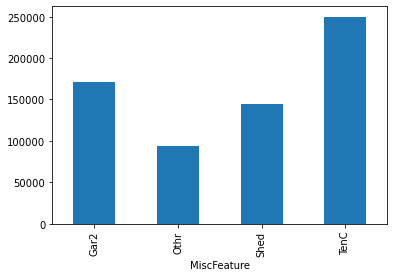

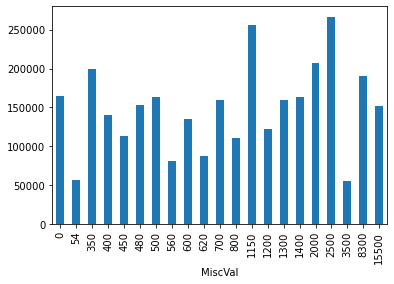

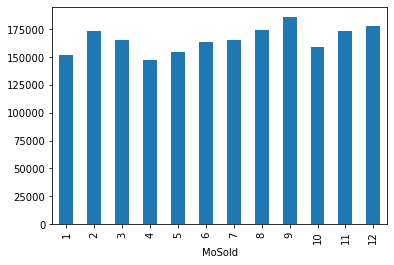

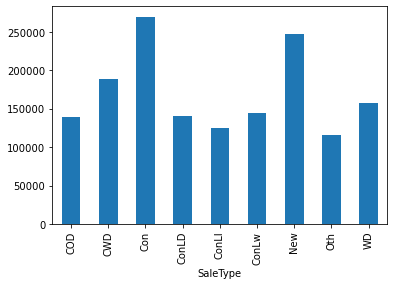

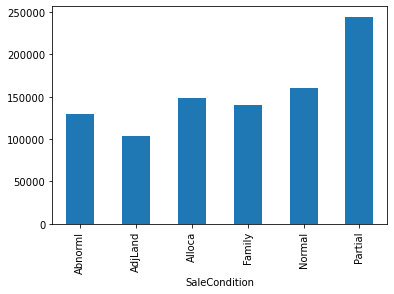

In [21]:
for feature in dis_var:
    data=df1.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()


In [22]:
df1.drop(['PoolQC'],axis=1,inplace=True)
df1['LotFrontage'].fillna(df1['LotFrontage'].mean(),inplace=True)

In [23]:
df1.drop(['MiscFeature',
'Alley','Fence'],axis=1,inplace=True)

In [24]:
df1['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [25]:
df1['FireplaceQu'].fillna(df1['FireplaceQu'].mode()[0],inplace=True)

In [26]:
pd.isna(df1['FireplaceQu']).sum()

0

In [27]:
df1['FireplaceQu'].mode()[0]

'Gd'

In [28]:
df1.loc[:,['GarageType','GarageYrBlt',     
'GarageFinish',    
'GarageCond', 
'GarageQual',      
'BsmtExposure',    
'BsmtFinType2',    
'BsmtFinType1',    
'BsmtCond',        
'BsmtQual',        
'MasVnrType',       
'MasVnrArea',       
'Electrical'
] ]

,GarageType,GarageYrBlt,GarageFinish,GarageCond,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,MasVnrArea,Electrical
0,Attchd,2003.0,RFn,TA,TA,No,Unf,GLQ,TA,Gd,BrkFace,196.0,SBrkr
1,Attchd,1976.0,RFn,TA,TA,Gd,Unf,ALQ,TA,Gd,None,0.0,SBrkr
2,Attchd,2001.0,RFn,TA,TA,Mn,Unf,GLQ,TA,Gd,BrkFace,162.0,SBrkr
3,Detchd,1998.0,Unf,TA,TA,No,Unf,ALQ,Gd,TA,None,0.0,SBrkr
4,Attchd,2000.0,RFn,TA,TA,Av,Unf,GLQ,TA,Gd,BrkFace,350.0,SBrkr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Attchd,1999.0,RFn,TA,TA,No,Unf,Unf,TA,Gd,None,0.0,SBrkr
1456,Attchd,1978.0,Unf,TA,TA,No,Rec,ALQ,TA,Gd,Stone,119.0,SBrkr
1457,Attchd,1941.0,RFn,TA,TA,No,Unf,GLQ,Gd,TA,None,0.0,SBrkr
1458,Attchd,1950.0,Unf,TA,TA,Mn,Rec,GLQ,TA,TA,None,0.0,FuseA


In [29]:
def fillmiss(col):
    df1[col].fillna(df1[col].mode()[0],inplace=True)

In [30]:
lis=['GarageType','GarageYrBlt',     
'GarageFinish',    
'GarageCond', 
'GarageQual',      
'BsmtExposure',    
'BsmtFinType2',    
'BsmtFinType1',    
'BsmtCond',        
'BsmtQual',        
'MasVnrType',       
'MasVnrArea',       
'Electrical'
]

In [31]:
for x in lis:
    fillmiss(x)
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
df2=pd.read_csv('test_housing.csv')

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [34]:
df_null=pd.isnull(df2).apply(lambda x:x.sum())

df_null.sort_values(ascending=False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [35]:
df2['LotFrontage'].fillna(df2['LotFrontage'].mean(),inplace=True)
df2['FireplaceQu'].fillna(df2['FireplaceQu'].mode()[0],inplace=True)

In [36]:
def fillmiss(col):
    df2[col].fillna(df2[col].mode()[0],inplace=True)

In [39]:
for x in lis2:
    fillmiss(x)

In [38]:
lis2=lis+['MSZoning',          
'BsmtFullBath'      ,
'Functional'         , 
'BsmtHalfBath'        ,
'Utilities'           ,
'SaleType'            ,
'GarageCars'          ,
'GarageArea'          ,
'Exterior1st'         ,
'TotalBsmtSF'         ,
'Exterior2nd'        ,
'BsmtUnfSF'           ,
'BsmtFinSF2'         ,
'KitchenQual'         ,
'BsmtFinSF1'   ]

In [40]:
df2.drop(['PoolQC','MiscFeature',
'Alley','Fence'],axis=1,inplace=True)

In [41]:
X1_train=df1.drop('SalePrice',axis=1)
y1_train=df1['SalePrice']
X1_test=df2

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X=df1.drop('SalePrice',axis=1)
y=df1['SalePrice']

In [44]:
col_num=df1._get_numeric_data().columns
col_lis=list(col_num)
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [45]:
df_cat=df1.drop(col_lis,axis=1)
df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [46]:
i=0
for x in df_cat.columns:
 
    if (i==0):
        df_val=pd.DataFrame(df1[x].value_counts().reset_index())
    else:
        df_val=pd.concat([df_val,pd.DataFrame(df1[x].value_counts().reset_index())])
    i=i+1


In [47]:
#USE VALUE_COUNTS()

In [48]:

def dum(l):
    i=0
    for mar in l:
        if i==0:
            hot=pd.get_dummies(df1[mar],drop_first=True)
            df_hot=df1.copy()
            df_hot.drop(mar,axis=1,inplace=True)
            df_final=pd.concat([df_hot,hot],axis=1)
        else:
            hot2=pd.get_dummies(df1[mar],drop_first=True)
            df_final.drop(mar,axis=1,inplace=True)
            df_final=pd.concat([df_final,hot],axis=1)
        i=i+1
    return df_final   
        

In [ ]:
df1_final=dum(list(df_cat.columns.drop(['MiscFeature',
'Alley','Fence'])))

In [ ]:
df1_final.columns

In [86]:
df_cat.columns.drop('Alley')

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [90]:

def dum2(l):
    i=0
    for mar in l:
        if i==0:
            hot=pd.get_dummies(df2[mar],drop_first=True)
            df_hot=df2.copy()
            df_hot.drop(mar,axis=1,inplace=True)
            df_final=pd.concat([df_hot,hot],axis=1)
        else:
            hot2=pd.get_dummies(df2[mar],drop_first=True)
            df_final.drop(mar,axis=1,inplace=True)
            df_final=pd.concat([df_final,hot],axis=1)
        i=i+1
    return df_final   

In [116]:
df2_final=dum2(list(df_cat.columns.drop(['MiscFeature',
'Alley','Fence'])))

In [118]:
df2_final

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,RL,RM,FV,RH,RL,RM,FV,RH,RL,RM
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,1,0,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,1,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,1,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,1,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,1,0,0,0,1,0,0,0,1
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,1,0,0,0,1,0,0,0,1,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,1,0,0,0,1,0,0,0,1,0


In [135]:
rfc.fit(df1_final.drop('SalePrice',axis=1),df1_final['SalePrice'])

RandomForestRegressor()

In [136]:
pred=rfc.predict(df2_final)

In [122]:
X=df1_final.drop('SalePrice',axis=1)
y=df1_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfc2=RandomForestRegressor()


In [123]:
rfc2.fit(X_train,y_train)

RandomForestRegressor()

In [134]:
pred2=rfc2.predict(X_test)

In [126]:
import sklearn

In [128]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)

968590595.8642677

In [129]:
df3=pd.read_csv('sample_submission.csv')

In [130]:
df3.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [139]:
df_sub=pd.concat([df3['Id'],pd.DataFrame(pred)],axis=1)

In [140]:
df_sub.columns=['Id','SalePrice']

In [142]:
df_sub.to_csv('Sub2.csv',index=False)